In [1]:
# Dependecies
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.patches as mpatches
import cartopy.crs as ccrs
import cartopy.feature as cfeature

import warnings
warnings.filterwarnings('ignore')


In [19]:
# Path to load the datasets
path_chl_N_O = 'data/cmems_mod_glo_bgc_my_0.25_P1M-m_1662656229772.nc'
path_02 = 'data/cmems_mod_glo_bgc_my_0.25_P1M-m_1662656343650.nc'

# Products Variables
chl_N_O = xr.open_dataset(path_chl_N_O)
O2 = xr.open_dataset(path_02)

## Oxygen concentration (Hypoxic Areas)

In [27]:
# Display the o2 variable (and dephts)
O2

<xarray.Dataset>
Dimensions:    (time: 38, depth: 47, latitude: 21, longitude: 29)
Coordinates:
  * depth      (depth) float32 0.5058 1.556 2.668 ... 856.7 947.4 1.046e+03
  * latitude   (latitude) float32 -49.0 -48.75 -48.5 ... -44.5 -44.25 -44.0
  * time       (time) datetime64[ns] 2013-12-16T12:00:00 ... 2017-01-16T12:00:00
  * longitude  (longitude) float32 -79.0 -78.75 -78.5 ... -72.5 -72.25 -72.0
Data variables:
    o2         (time, depth, latitude, longitude) float32 296.6 296.5 ... nan
Attributes: (12/17)
    product:                       GLOBAL_REANALYSIS_BIO_001_029
    producer:                      CMEMS - Global Monitoring and Forecasting ...
    title:                         Monthly mean fields for product GLOBAL_REA...
    area:                          GLOBAL
    quality_information_document:  http://marine.copernicus.eu/documents/QUID...
    Conventions:                   CF-1.6
    ...                            ...
    dataset:                       global-reanalysis-bio-001-029-monthly
    institution:                   Mercator Ocean
    product_user_manual:           http://marine.copernicus.eu/documents/PUM/...
    _CoordSysBuilder:              ucar.nc2.dataset.conv.CF1Convention
    comment:                       
    history:                       Data extracted from dataset http://localho...

In [31]:
# Convert the units 
o2 = O2 * 32 / 1000

In [36]:
# Define the coordinates of the points to study
lon1, lat1 = -75.5 , -45 # Blue
lon2, lat2 = -75 , -44.2 # Yellow 
lon3, lat3 = -73.6 , -44.8 # Green
lon4, lat4 = -75.7 , -44.5 # Red

# Define the date to study
date = '2016-03-16T00'

# Select the product at this location and date and select the variable o2
o2_1 = o2.sel(longitude = lon1, latitude = lat1, time = date, method = 'nearest').o2
o2_2 = o2.sel(longitude = lon2, latitude = lat2, time = date, method = 'nearest').o2
o2_3 = o2.sel(longitude = lon3, latitude = lat3, time = date, method = 'nearest').o2
o2_4 = o2.sel(longitude = lon4, latitude = lat4, time = date, method = 'nearest').o2

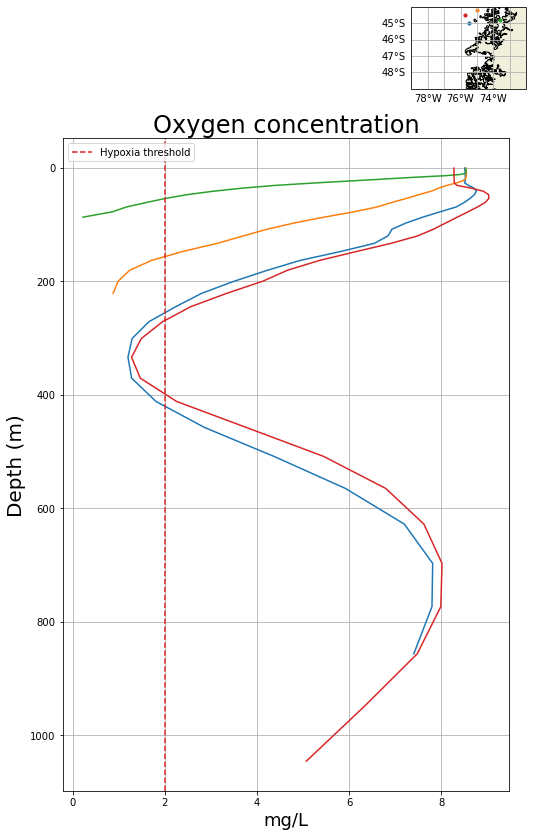

In [37]:
# Define the characteristics of the plot
f = plt.figure(figsize=(8,12))                                       # create a figure and define its size
ax = f.add_subplot(111)                                              # create the axes of the plot
ax.grid()                                                            # add the grid lines
ax.set_title("Oxygen concentration",fontsize=24)                     # add the figure title
ax.invert_yaxis()                                                    # reverse the y axis
ax.set_xlabel("mg/L",fontsize=18)                                    # set x axis label
ax.set_ylabel("Depth (m)",fontsize=20)                               # set y axis label 


# Plot the vertical profiles 
ax.plot(o2_1,o2_1['depth'],'tab:blue')               
ax.plot(o2_2,o2_2['depth'],'tab:orange')                             
ax.plot(o2_3,o2_3['depth'],'tab:green')                              
ax.plot(o2_4,o2_4['depth'],'tab:red')      

# Add the threshold value
ax.axvline(x = 2, ls='--',color = 'tab:red',label='Hypoxia threshold')

# Display the locations of the glider on a mini map
ax_mini_map = f.add_axes([0.73, 0.91, 0.2, 0.15], projection=ccrs.PlateCarree()) # create the minimap and define its projection
gl = ax_mini_map.gridlines(draw_labels=True)                                     # add the coastlines
gl.right_labels = False                                                          # remove latitude labels on the right
gl.top_labels = False                                                            # remove longitude labels on the top
ax_mini_map.add_feature(cfeature.LAND, zorder=0, edgecolor='k')                  # add land mask 
ax_mini_map.set_extent([-79, -72, -44, -49],crs=ccrs.PlateCarree())          # define the extent of the map [lon_min,lon_max,lat_min,lat_max]
ax_mini_map.scatter(lon1, lat1, 10,'tab:blue',transform=ccrs.PlateCarree())         # plot location of point 1
ax_mini_map.scatter(lon2, lat2, 10,'tab:orange',transform=ccrs.PlateCarree())       # plot location of point 2
ax_mini_map.scatter(lon3, lat3, 10,'tab:green',transform=ccrs.PlateCarree())        # plot location of point 3
ax_mini_map.scatter(lon4, lat4, 10,'tab:red',transform=ccrs.PlateCarree())          # plot location of point 4
ax.legend(loc="upper left")                                              # add the legend

#Save figure
plt.savefig('images/oxygen-nut/o2_vertical_profile163.png')

In [41]:
# Select the minimum oxygen value 
o2_min = o2.min('depth')

# See the result
o2_min

<xarray.Dataset>
Dimensions:    (latitude: 21, time: 38, longitude: 29)
Coordinates:
  * latitude   (latitude) float32 -49.0 -48.75 -48.5 ... -44.5 -44.25 -44.0
  * time       (time) datetime64[ns] 2013-12-16T12:00:00 ... 2017-01-16T12:00:00
  * longitude  (longitude) float32 -79.0 -78.75 -78.5 ... -72.5 -72.25 -72.0
Data variables:
    o2         (time, latitude, longitude) float32 6.935 6.905 6.856 ... nan nan

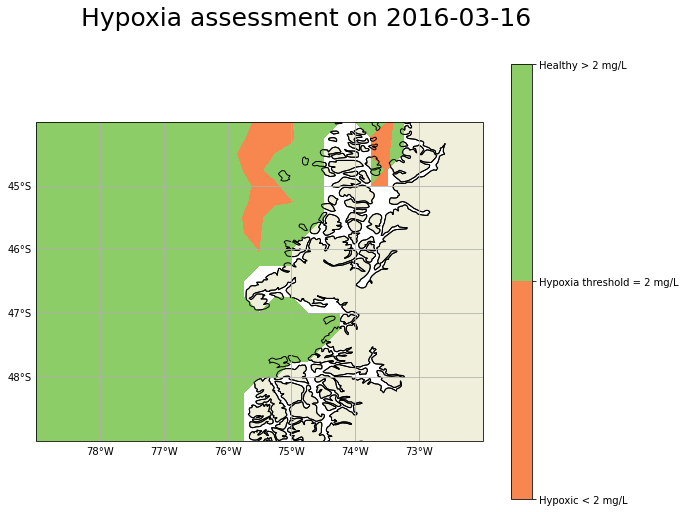

In [42]:

# Define the date to display
date = '2016-03-16'

# Select the model oxygen variable at this date
o2_min_date = o2_min.sel(time=date).squeeze().o2

# Define the characteristics of the plot
f = plt.figure(figsize=(10, 8))                                                    # create a figure and define its size
ax = plt.axes(projection=ccrs.PlateCarree())                                       # create an ax and select the projection of the map
ax.coastlines()                                                                    # add the coastlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)                        # add the longitude / latitude lines
gl.right_labels = False                                                            # remove latitude labels on the right
gl.top_labels = False                                                              # remove longitude labels on the top
ax.add_feature(cfeature.LAND, zorder=1, edgecolor='k')                             # add land mask
ax.set_extent([-79, -72, -44, -49],crs=ccrs.PlateCarree())                             # define the extent of the map [lon_min,lon_max,lat_min,lat_max]

# Plot the sea surface temperature, set the min/max values of the colorbar and the colormap to use
# im = ax.pcolor(o2_2005_2014['longitude'].data, o2_2005_2014['latitude'].data,o2_2005_2014,shading='nearest',cmap='plasma')
#im = ax.pcolor(o2_min['longitude'].data, o2_min['latitude'].data,o2_min,shading='nearest',cmap='plasma')
im = ax.contourf(o2_min_date['longitude'].data, o2_min_date['latitude'].data,o2_min_date,[-10,2,15],cmap='RdYlGn')

# Add the titles and legend
f.suptitle('Hypoxia assessment on ' + date ,fontsize=25)                           # add a title to the figure
cbar = f.colorbar(im,ax=ax)                                                        # add the colorbar
cbar.ax.set_yticklabels(['Hypoxic < 2 mg/L', 'Hypoxia threshold = 2 mg/L', 'Healthy > 2 mg/L'])                     # add the labels of the colorbar

#Save figure
plt.savefig('images/oxygen-nut/hypoxia_assessment_16_3.png')

In [38]:
# Define the coordinates of the points to study
lon1, lat1 = -75.5 , -45 # Blue
lon2, lat2 = -75 , -44.2 # Yellow 
lon3, lat3 = -73.6 , -44.8 # Green
lon4, lat4 = -75.7 , -44.5 # Red

# Define the date to study
date = '2015-03-16T00'

# Select the product at this location and date and select the variable o2
o2_1 = o2.sel(longitude = lon1, latitude = lat1, time = date, method = 'nearest').o2
o2_2 = o2.sel(longitude = lon2, latitude = lat2, time = date, method = 'nearest').o2
o2_3 = o2.sel(longitude = lon3, latitude = lat3, time = date, method = 'nearest').o2
o2_4 = o2.sel(longitude = lon4, latitude = lat4, time = date, method = 'nearest').o2

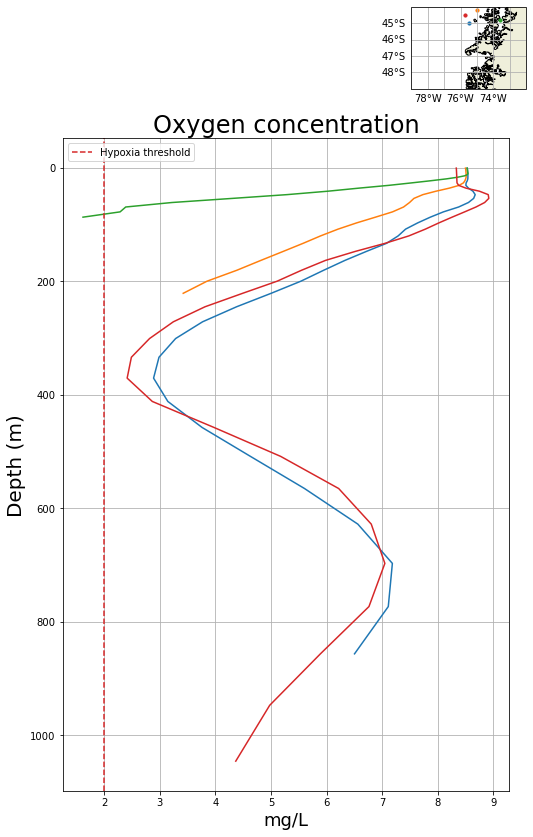

In [39]:
# Define the characteristics of the plot
f = plt.figure(figsize=(8,12))                                       # create a figure and define its size
ax = f.add_subplot(111)                                              # create the axes of the plot
ax.grid()                                                            # add the grid lines
ax.set_title("Oxygen concentration",fontsize=24)                     # add the figure title
ax.invert_yaxis()                                                    # reverse the y axis
ax.set_xlabel("mg/L",fontsize=18)                                    # set x axis label
ax.set_ylabel("Depth (m)",fontsize=20)                               # set y axis label 


# Plot the vertical profiles 
ax.plot(o2_1,o2_1['depth'],'tab:blue')               
ax.plot(o2_2,o2_2['depth'],'tab:orange')                             
ax.plot(o2_3,o2_3['depth'],'tab:green')                              
ax.plot(o2_4,o2_4['depth'],'tab:red')      

# Add the threshold value
ax.axvline(x = 2, ls='--',color = 'tab:red',label='Hypoxia threshold')

# Display the locations of the glider on a mini map
ax_mini_map = f.add_axes([0.73, 0.91, 0.2, 0.15], projection=ccrs.PlateCarree()) # create the minimap and define its projection
gl = ax_mini_map.gridlines(draw_labels=True)                                     # add the coastlines
gl.right_labels = False                                                          # remove latitude labels on the right
gl.top_labels = False                                                            # remove longitude labels on the top
ax_mini_map.add_feature(cfeature.LAND, zorder=0, edgecolor='k')                  # add land mask 
ax_mini_map.set_extent([-79, -72, -44, -49],crs=ccrs.PlateCarree())          # define the extent of the map [lon_min,lon_max,lat_min,lat_max]
ax_mini_map.scatter(lon1, lat1, 10,'tab:blue',transform=ccrs.PlateCarree())         # plot location of point 1
ax_mini_map.scatter(lon2, lat2, 10,'tab:orange',transform=ccrs.PlateCarree())       # plot location of point 2
ax_mini_map.scatter(lon3, lat3, 10,'tab:green',transform=ccrs.PlateCarree())        # plot location of point 3
ax_mini_map.scatter(lon4, lat4, 10,'tab:red',transform=ccrs.PlateCarree())          # plot location of point 4
ax.legend(loc="upper left")                                              # add the legend

#Save figure
plt.savefig('images/oxygen-nut/o2_vertical_profile15-3.png')

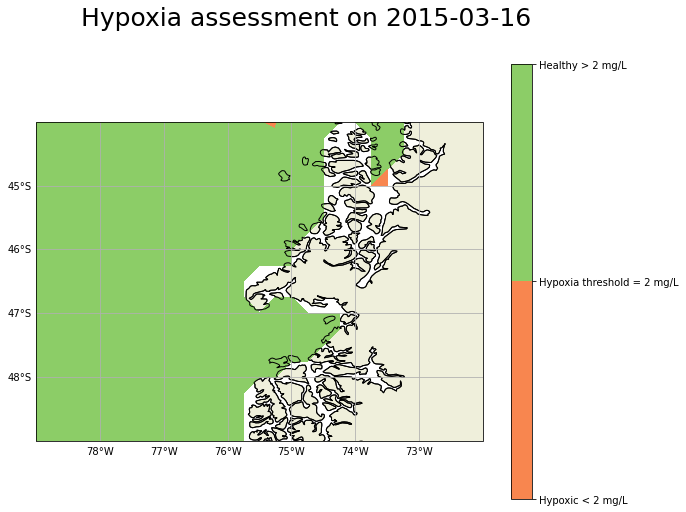

In [43]:
# Define the date to display
date = '2015-03-16'

# Select the model oxygen variable at this date
o2_min_date = o2_min.sel(time=date).squeeze().o2

# Define the characteristics of the plot
f = plt.figure(figsize=(10, 8))                                                    # create a figure and define its size
ax = plt.axes(projection=ccrs.PlateCarree())                                       # create an ax and select the projection of the map
ax.coastlines()                                                                    # add the coastlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)                        # add the longitude / latitude lines
gl.right_labels = False                                                            # remove latitude labels on the right
gl.top_labels = False                                                              # remove longitude labels on the top
ax.add_feature(cfeature.LAND, zorder=1, edgecolor='k')                             # add land mask
ax.set_extent([-79, -72, -44, -49],crs=ccrs.PlateCarree())                             # define the extent of the map [lon_min,lon_max,lat_min,lat_max]

# Plot the sea surface temperature, set the min/max values of the colorbar and the colormap to use
# im = ax.pcolor(o2_2005_2014['longitude'].data, o2_2005_2014['latitude'].data,o2_2005_2014,shading='nearest',cmap='plasma')
#im = ax.pcolor(o2_min['longitude'].data, o2_min['latitude'].data,o2_min,shading='nearest',cmap='plasma')
im = ax.contourf(o2_min_date['longitude'].data, o2_min_date['latitude'].data,o2_min_date,[-10,2,15],cmap='RdYlGn')

# Add the titles and legend
f.suptitle('Hypoxia assessment on ' + date ,fontsize=25)                           # add a title to the figure
cbar = f.colorbar(im,ax=ax)                                                        # add the colorbar
cbar.ax.set_yticklabels(['Hypoxic < 2 mg/L', 'Hypoxia threshold = 2 mg/L', 'Healthy > 2 mg/L'])                     # add the labels of the colorbar

#Save figure
plt.savefig('images/oxygen-nut/hypoxia_assessment_15_3.png')

In [47]:
# Define the coordinates of the points to study
lon1, lat1 = -75.5 , -45 # Blue
lon2, lat2 = -75 , -44.2 # Yellow 
lon3, lat3 = -73.6 , -44.8 # Green
lon4, lat4 = -75.7 , -44.5 # Red

# Define the date to study
date = '2015-04-16T00'

# Select the product at this location and date and select the variable o2
o2_1 = o2.sel(longitude = lon1, latitude = lat1, time = date, method = 'nearest').o2
o2_2 = o2.sel(longitude = lon2, latitude = lat2, time = date, method = 'nearest').o2
o2_3 = o2.sel(longitude = lon3, latitude = lat3, time = date, method = 'nearest').o2
o2_4 = o2.sel(longitude = lon4, latitude = lat4, time = date, method = 'nearest').o2

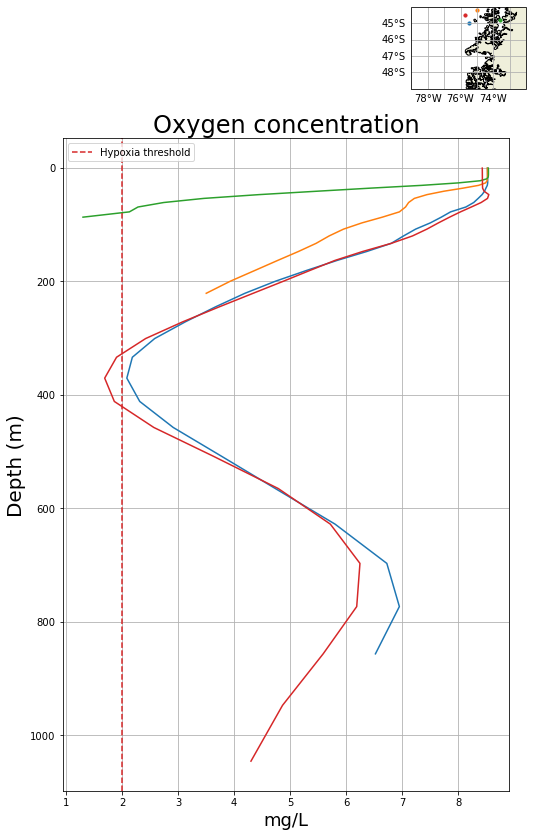

In [48]:
# Define the characteristics of the plot
f = plt.figure(figsize=(8,12))                                       # create a figure and define its size
ax = f.add_subplot(111)                                              # create the axes of the plot
ax.grid()                                                            # add the grid lines
ax.set_title("Oxygen concentration",fontsize=24)                     # add the figure title
ax.invert_yaxis()                                                    # reverse the y axis
ax.set_xlabel("mg/L",fontsize=18)                                    # set x axis label
ax.set_ylabel("Depth (m)",fontsize=20)                               # set y axis label 


# Plot the vertical profiles 
ax.plot(o2_1,o2_1['depth'],'tab:blue')               
ax.plot(o2_2,o2_2['depth'],'tab:orange')                             
ax.plot(o2_3,o2_3['depth'],'tab:green')                              
ax.plot(o2_4,o2_4['depth'],'tab:red')      

# Add the threshold value
ax.axvline(x = 2, ls='--',color = 'tab:red',label='Hypoxia threshold')

# Display the locations of the glider on a mini map
ax_mini_map = f.add_axes([0.73, 0.91, 0.2, 0.15], projection=ccrs.PlateCarree()) # create the minimap and define its projection
gl = ax_mini_map.gridlines(draw_labels=True)                                     # add the coastlines
gl.right_labels = False                                                          # remove latitude labels on the right
gl.top_labels = False                                                            # remove longitude labels on the top
ax_mini_map.add_feature(cfeature.LAND, zorder=0, edgecolor='k')                  # add land mask 
ax_mini_map.set_extent([-79, -72, -44, -49],crs=ccrs.PlateCarree())          # define the extent of the map [lon_min,lon_max,lat_min,lat_max]
ax_mini_map.scatter(lon1, lat1, 10,'tab:blue',transform=ccrs.PlateCarree())         # plot location of point 1
ax_mini_map.scatter(lon2, lat2, 10,'tab:orange',transform=ccrs.PlateCarree())       # plot location of point 2
ax_mini_map.scatter(lon3, lat3, 10,'tab:green',transform=ccrs.PlateCarree())        # plot location of point 3
ax_mini_map.scatter(lon4, lat4, 10,'tab:red',transform=ccrs.PlateCarree())          # plot location of point 4
ax.legend(loc="upper left")                                              # add the legend

#Save figure
plt.savefig('images/oxygen-nut/o2_vertical_profile15-4.png')

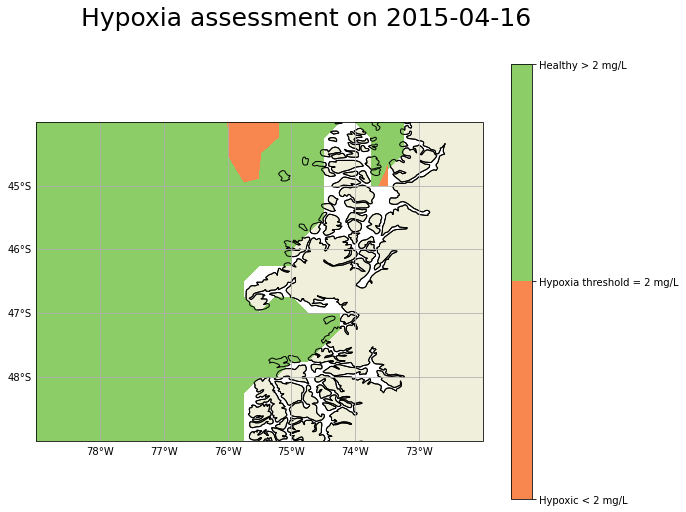

In [44]:
# Define the date to display
date = '2015-04-16'

# Select the model oxygen variable at this date
o2_min_date = o2_min.sel(time=date).squeeze().o2

# Define the characteristics of the plot
f = plt.figure(figsize=(10, 8))                                                    # create a figure and define its size
ax = plt.axes(projection=ccrs.PlateCarree())                                       # create an ax and select the projection of the map
ax.coastlines()                                                                    # add the coastlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)                        # add the longitude / latitude lines
gl.right_labels = False                                                            # remove latitude labels on the right
gl.top_labels = False                                                              # remove longitude labels on the top
ax.add_feature(cfeature.LAND, zorder=1, edgecolor='k')                             # add land mask
ax.set_extent([-79, -72, -44, -49],crs=ccrs.PlateCarree())                             # define the extent of the map [lon_min,lon_max,lat_min,lat_max]

# Plot the sea surface temperature, set the min/max values of the colorbar and the colormap to use
# im = ax.pcolor(o2_2005_2014['longitude'].data, o2_2005_2014['latitude'].data,o2_2005_2014,shading='nearest',cmap='plasma')
#im = ax.pcolor(o2_min['longitude'].data, o2_min['latitude'].data,o2_min,shading='nearest',cmap='plasma')
im = ax.contourf(o2_min_date['longitude'].data, o2_min_date['latitude'].data,o2_min_date,[-10,2,15],cmap='RdYlGn')

# Add the titles and legend
f.suptitle('Hypoxia assessment on ' + date ,fontsize=25)                           # add a title to the figure
cbar = f.colorbar(im,ax=ax)                                                        # add the colorbar
cbar.ax.set_yticklabels(['Hypoxic < 2 mg/L', 'Hypoxia threshold = 2 mg/L', 'Healthy > 2 mg/L'])                     # add the labels of the colorbar

#Save figure
plt.savefig('images/oxygen-nut/hypoxia_assessment_15_04.png')

In [49]:
# Define the coordinates of the points to study
lon1, lat1 = -75.5 , -45 # Blue
lon2, lat2 = -75 , -44.2 # Yellow 
lon3, lat3 = -73.6 , -44.8 # Green
lon4, lat4 = -75.7 , -44.5 # Red

# Define the date to study
date = '2015-05-16T00'

# Select the product at this location and date and select the variable o2
o2_1 = o2.sel(longitude = lon1, latitude = lat1, time = date, method = 'nearest').o2
o2_2 = o2.sel(longitude = lon2, latitude = lat2, time = date, method = 'nearest').o2
o2_3 = o2.sel(longitude = lon3, latitude = lat3, time = date, method = 'nearest').o2
o2_4 = o2.sel(longitude = lon4, latitude = lat4, time = date, method = 'nearest').o2

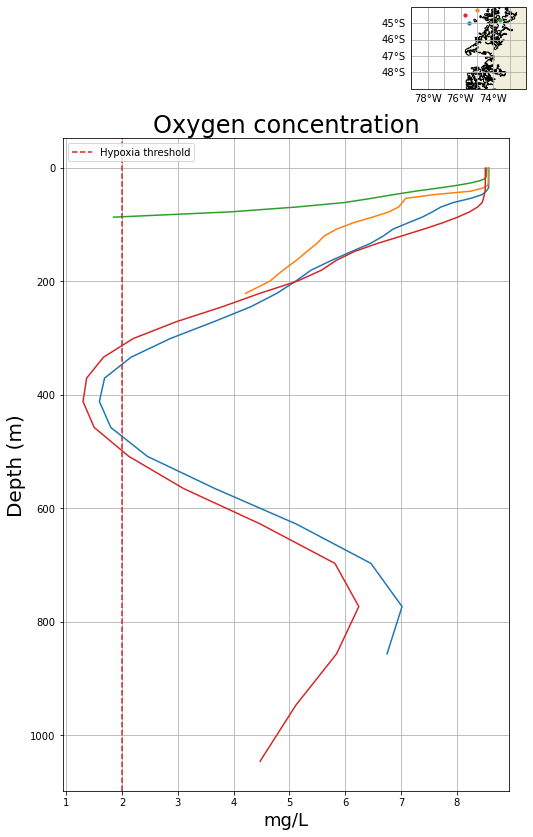

In [50]:
# Define the characteristics of the plot
f = plt.figure(figsize=(8,12))                                       # create a figure and define its size
ax = f.add_subplot(111)                                              # create the axes of the plot
ax.grid()                                                            # add the grid lines
ax.set_title("Oxygen concentration",fontsize=24)                     # add the figure title
ax.invert_yaxis()                                                    # reverse the y axis
ax.set_xlabel("mg/L",fontsize=18)                                    # set x axis label
ax.set_ylabel("Depth (m)",fontsize=20)                               # set y axis label 


# Plot the vertical profiles 
ax.plot(o2_1,o2_1['depth'],'tab:blue')               
ax.plot(o2_2,o2_2['depth'],'tab:orange')                             
ax.plot(o2_3,o2_3['depth'],'tab:green')                              
ax.plot(o2_4,o2_4['depth'],'tab:red')      

# Add the threshold value
ax.axvline(x = 2, ls='--',color = 'tab:red',label='Hypoxia threshold')

# Display the locations of the glider on a mini map
ax_mini_map = f.add_axes([0.73, 0.91, 0.2, 0.15], projection=ccrs.PlateCarree()) # create the minimap and define its projection
gl = ax_mini_map.gridlines(draw_labels=True)                                     # add the coastlines
gl.right_labels = False                                                          # remove latitude labels on the right
gl.top_labels = False                                                            # remove longitude labels on the top
ax_mini_map.add_feature(cfeature.LAND, zorder=0, edgecolor='k')                  # add land mask 
ax_mini_map.set_extent([-79, -72, -44, -49],crs=ccrs.PlateCarree())          # define the extent of the map [lon_min,lon_max,lat_min,lat_max]
ax_mini_map.scatter(lon1, lat1, 10,'tab:blue',transform=ccrs.PlateCarree())         # plot location of point 1
ax_mini_map.scatter(lon2, lat2, 10,'tab:orange',transform=ccrs.PlateCarree())       # plot location of point 2
ax_mini_map.scatter(lon3, lat3, 10,'tab:green',transform=ccrs.PlateCarree())        # plot location of point 3
ax_mini_map.scatter(lon4, lat4, 10,'tab:red',transform=ccrs.PlateCarree())          # plot location of point 4
ax.legend(loc="upper left")                                              # add the legend

#Save figure
plt.savefig('images/oxygen-nut/o2_vertical_profile_15-5.png')

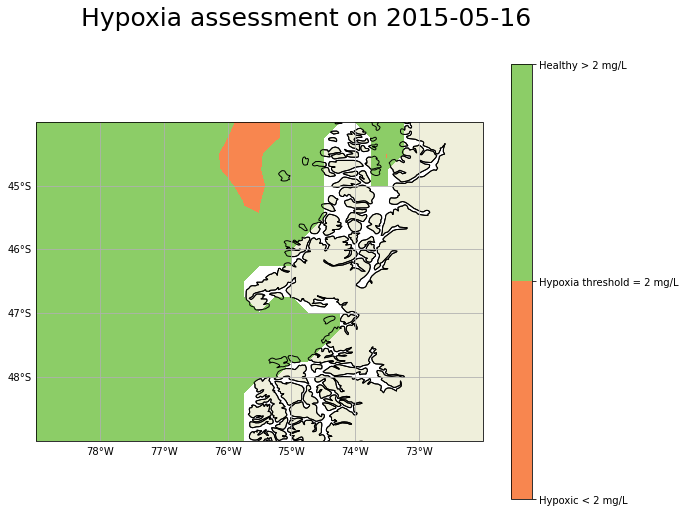

In [45]:
# Define the date to display
date = '2015-05-16'

# Select the model oxygen variable at this date
o2_min_date = o2_min.sel(time=date).squeeze().o2

# Define the characteristics of the plot
f = plt.figure(figsize=(10, 8))                                                    # create a figure and define its size
ax = plt.axes(projection=ccrs.PlateCarree())                                       # create an ax and select the projection of the map
ax.coastlines()                                                                    # add the coastlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)                        # add the longitude / latitude lines
gl.right_labels = False                                                            # remove latitude labels on the right
gl.top_labels = False                                                              # remove longitude labels on the top
ax.add_feature(cfeature.LAND, zorder=1, edgecolor='k')                             # add land mask
ax.set_extent([-79, -72, -44, -49],crs=ccrs.PlateCarree())                             # define the extent of the map [lon_min,lon_max,lat_min,lat_max]

# Plot the sea surface temperature, set the min/max values of the colorbar and the colormap to use
# im = ax.pcolor(o2_2005_2014['longitude'].data, o2_2005_2014['latitude'].data,o2_2005_2014,shading='nearest',cmap='plasma')
#im = ax.pcolor(o2_min['longitude'].data, o2_min['latitude'].data,o2_min,shading='nearest',cmap='plasma')
im = ax.contourf(o2_min_date['longitude'].data, o2_min_date['latitude'].data,o2_min_date,[-10,2,15],cmap='RdYlGn')

# Add the titles and legend
f.suptitle('Hypoxia assessment on ' + date ,fontsize=25)                           # add a title to the figure
cbar = f.colorbar(im,ax=ax)                                                        # add the colorbar
cbar.ax.set_yticklabels(['Hypoxic < 2 mg/L', 'Hypoxia threshold = 2 mg/L', 'Healthy > 2 mg/L'])                     # add the labels of the colorbar

#Save figure
plt.savefig('images/oxygen-nut/hypoxia_assessment_15_05.png')

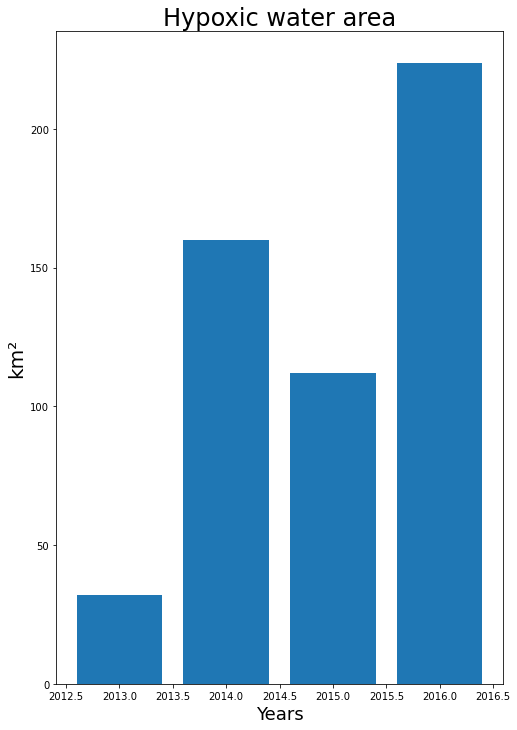

In [46]:
# Calculate the yearly average
o2_min_year = o2_min.groupby('time.year').mean('time')

# Initialize the lists to be ploted
years = []
areas = []

# Loop on the years
for year in range(2013,2017):
    o2_min_year_date = o2_min_year.sel(year=year)             # Select the year
    area = o2_min_year_date.o2.where(o2_min_year_date<2).count().o2 * 16      # Calculate the area
    areas.append(float(area))
    years.append(year)

# Define the characteristics of the plot
f = plt.figure(figsize=(8,12))                                # create a figure and define its size
ax = f.add_subplot(111)                                       # create the axes of the plot
ax.set_title("Hypoxic water area",fontsize=24)                     # add the figure title
ax.set_xlabel("Years",fontsize=18)                        # set x axis label
ax.set_ylabel("km²",fontsize=20)                               # set y axis label 

# Plot the bar charts 
ax.bar(years,areas)

#Save figure
plt.savefig('images/oxygen-nut/hypoxic_areas.png')

## Chlorophyll - Nutrients - Oxygen

In [4]:
# Display the target variables
chl_N_O

<xarray.Dataset>
Dimensions:    (time: 38, depth: 1, latitude: 21, longitude: 29)
Coordinates:
  * depth      (depth) float32 0.5058
  * latitude   (latitude) float32 -49.0 -48.75 -48.5 ... -44.5 -44.25 -44.0
  * time       (time) datetime64[ns] 2013-12-16T12:00:00 ... 2017-01-16T12:00:00
  * longitude  (longitude) float32 -79.0 -78.75 -78.5 ... -72.5 -72.25 -72.0
Data variables:
    no3        (time, depth, latitude, longitude) float32 ...
    o2         (time, depth, latitude, longitude) float32 ...
    chl        (time, depth, latitude, longitude) float32 ...
Attributes: (12/17)
    product:                       GLOBAL_REANALYSIS_BIO_001_029
    producer:                      CMEMS - Global Monitoring and Forecasting ...
    title:                         Monthly mean fields for product GLOBAL_REA...
    area:                          GLOBAL
    quality_information_document:  http://marine.copernicus.eu/documents/QUID...
    Conventions:                   CF-1.6
    ...                            ...
    dataset:                       global-reanalysis-bio-001-029-monthly
    institution:                   Mercator Ocean
    product_user_manual:           http://marine.copernicus.eu/documents/PUM/...
    _CoordSysBuilder:              ucar.nc2.dataset.conv.CF1Convention
    comment:                       
    history:                       Data extracted from dataset http://localho...

In [24]:
# Calculate the average parameters
chl_N_O_average = chl_N_O.mean('latitude').mean('longitude')

# Check the results
chl_N_O_average


<xarray.Dataset>
Dimensions:  (time: 38, depth: 1)
Coordinates:
  * depth    (depth) float32 0.5058
  * time     (time) datetime64[ns] 2013-12-16T12:00:00 ... 2017-01-16T12:00:00
Data variables:
    no3      (time, depth) float32 8.155 7.813 7.386 7.543 ... 7.343 6.948 6.605
    o2       (time, depth) float32 280.4 272.4 270.1 270.1 ... 282.2 274.2 269.5
    chl      (time, depth) float32 0.6107 0.6094 0.6761 ... 0.616 0.542 0.5326

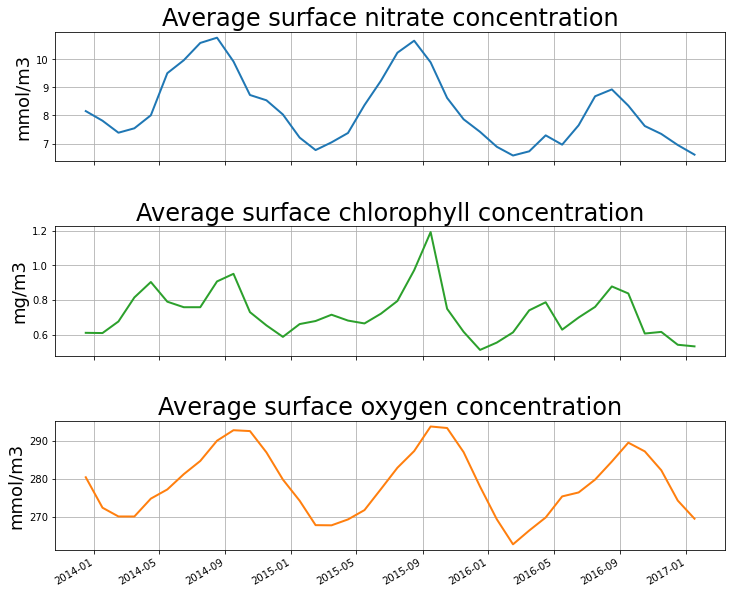

In [6]:
# Define the characteristics of the plot  
f = plt.figure(figsize=(12,12))
ax1 = f.add_subplot(311)
ax2 = f.add_subplot(312)
ax3 = f.add_subplot(313)
f.subplots_adjust(top=0.8,bottom=0.05,hspace = 0.5)

# First plot : Nitrate
ax1.set_title("Average surface nitrate concentration",fontsize=24)
ax1.grid()
ax1.set_ylabel("mmol/m3",fontsize=18)
ax1.plot(chl_N_O_average.time,chl_N_O_average.no3,c='tab:blue',linewidth=2)
f.autofmt_xdate()

# Second plot : Chlorophyll
ax2.set_title("Average surface chlorophyll concentration",fontsize=24)
ax2.grid()
ax2.set_ylabel("mg/m3",fontsize=18)
ax2.plot(chl_N_O_average.time,chl_N_O_average.chl,c='tab:green',linewidth=2)

# Third plot : Oxygen
ax3.set_title("Average surface oxygen concentration",fontsize=24)
ax3.grid()
ax3.set_ylabel("mmol/m3",fontsize=18)
ax3.plot(chl_N_O_average.time,chl_N_O_average.o2,c='tab:orange',linewidth=2)